### Imports

In [1]:
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import geo.caustic_frame as caustic_frame
import monte_carlo_simulation as mcs
from bandstructure.circular_bandstructure import circular
from matplotlib.animation import FuncAnimation

### Simulation

In [2]:
k = circular(201)
tef_frame = caustic_frame.Frame('geo/tef.dxf')
field = 12.0
phi = 0
n_inject = 1
np.random.seed(42)
sim = mcs.Simulation(tef_frame, k, phi, field, 0)
edge_to_collisions, trajectories = sim.run_simulation(n_inject)
print(f'{field:.1f} T: {list(map(len, trajectories))}')

f is 0.9396037651571585
f is 0.8120393724345466
f is 0.9423600712631162
f is 0.823272786429503
f is 0.946112068173574
f is 0.8344849430335851
f is 0.9507403577003075
f is 0.8457229896743035
f is 0.9561465050362561
f is 0.18679126808278493
f is 0.8132087319171234
f is 0.18679126808278493
f is 0.8132087319171201
f is 0.18679126808289367
f is 0.8132087319171277
f is 0.18679126808278834
f is 0.8132087319171157
f is 0.18679126808290739
f is 0.2226989552155393
f is 0.783782428221242
f is 0.7324971860328048
f is 0.2675028139671539
f is 0.7324971860328048
f is 0.2675028139671539
f is 0.7324971860328415
f is 0.2675028139671539
12.0 T: [2115]


<IPython.core.display.Javascript object>


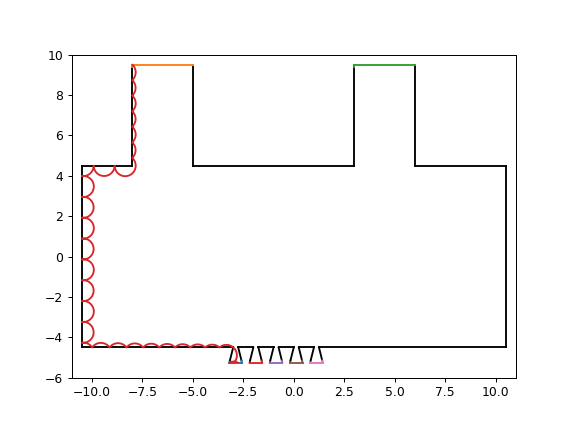

In [3]:
trajectory = trajectories[0]
fig = tef_frame.gen_fig()
ns, xs, ys, state, edge = zip(*trajectory)
plt.plot(xs,ys, 'C3-')
plt.xlim(-11, 11)
plt.ylim(-6, 10)
ax = plt.gca()
ax.set_aspect('equal')

### Animation

<IPython.core.display.Javascript object>


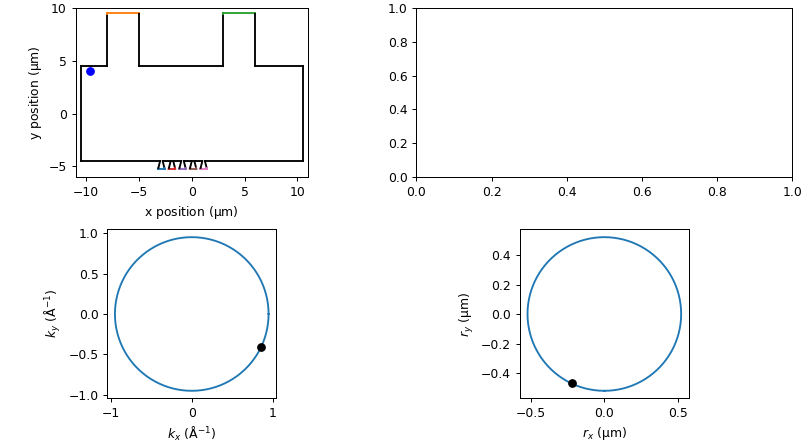

In [4]:
FRAME_SKIP = 1
INTERVAL = 100 #bigger is slower, this is interval between frames
trajectory = trajectories[0]
ns, xs, ys, state, edge = zip(*trajectory)

plt.rcParams['figure.figsize'] = [9, 5]
fig, ((ax1, aa), (ax2, ax3)) = plt.subplots(2, 2, constrained_layout=True)

plt.subplot(2, 2, (1))
ax1.set_xlim(-11, 11)
ax1.set_ylim(-6, 10)
for edge in tef_frame.edges:
    x, y = [edge.xs, edge.ys]
    if edge.layer == 0:
        plt.plot(x, y, color='k')
    else:
        plt.plot(x, y, color='C'+str(edge.layer-1))
plt.xlabel(r'x position ($\mathrm{\mu m}$)')
plt.ylabel(r'y position ($\mathrm{\mu m}$)')
line1, = ax1.plot([], [], 'bo')
ax1.set_aspect('equal')

plt.subplot(2, 2, 3)
plt.plot(k[0], k[1])
plt.xlabel(r'$k_x\ (\mathrm{\AA^{-1}})$')
plt.ylabel(r'$k_y\ (\mathrm{\AA^{-1}})$')
line2, = ax2.plot([], [], color='black', linestyle='dashdot', marker='o')
ax2.set_aspect('equal')

plt.subplot(2, 2, 4)
plt.plot(sim._bandstructure.r[0], sim._bandstructure.r[1])
plt.xlabel(r'$r_x\ (\mathrm{\mu m})$')
plt.ylabel(r'$r_y\ (\mathrm{\mu m})$')
line3, = ax3.plot([], [], color='black', linestyle='dashdot', marker='o')
ax3.set_aspect('equal')

def animate(frame_num):
    frame_num_adapted = frame_num*FRAME_SKIP
    line1.set_data((xs[frame_num_adapted], ys[frame_num_adapted]))
    line2.set_data(k[0][ns[frame_num_adapted][0]], k[1][ns[frame_num_adapted][0]])
    #line3.set_data(k[0][ns[frame_num_adapted][0]], k[1][ns[frame_num_adapted][0]])
    line3.set_data(sim._bandstructure.r[0][ns[frame_num_adapted][0]], sim._bandstructure.r[1][ns[frame_num_adapted][0]])

anim = FuncAnimation(fig, animate, frames=int(len(xs)/FRAME_SKIP), interval=INTERVAL)
plt.show()

